In [547]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [548]:
# Import dataset
#path ='dataset/'
path = '/content/insurance.csv'
df = pd.read_csv(path)
#print('\nNumber of rows and columns in the data set: ',df.shape)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [549]:
# desribe the dataset (Exploratory data analysis) 
#basic eda includes head,shape,info,summary of dataset
print("HEAD OF DATASET")
df.head()

HEAD OF DATASET


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [550]:
print("SHAPE OF DATASET")
df.shape

SHAPE OF DATASET


(1338, 7)

In [551]:
print("INFO OF DATASET")
df.info()

INFO OF DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [552]:
print("SUMMARY OF DATASET")
df.describe()

SUMMARY OF DATASET


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [553]:
#Check for missing value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [554]:
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

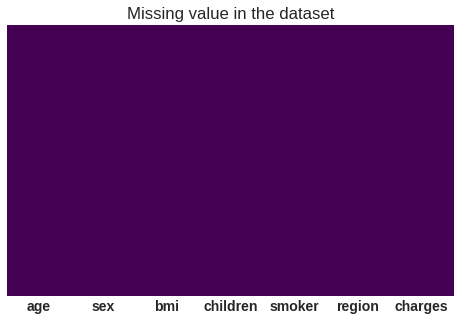

In [555]:
#visualisation of null values using sns plot
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

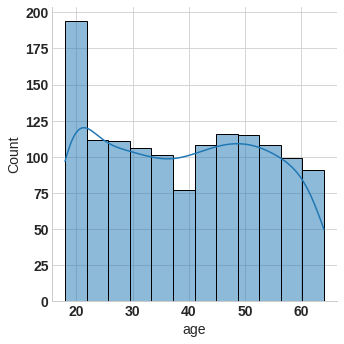

In [556]:
sns.displot(df['age'],kde=True)

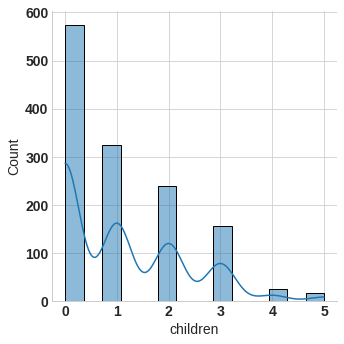

In [557]:
sns.displot(df['children'],kde=True)

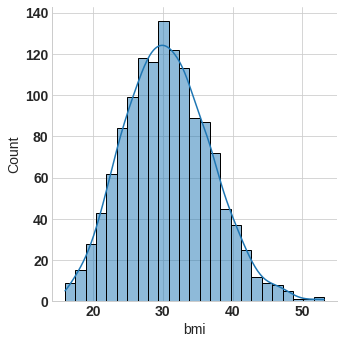

In [558]:
sns.displot(df['bmi'],kde=True)

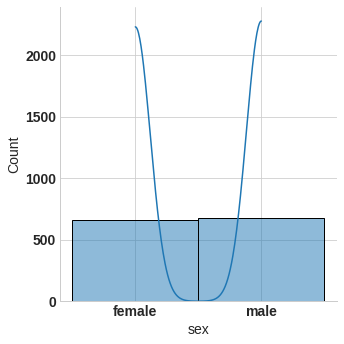

In [559]:
sns.displot(df['sex'],kde=True)

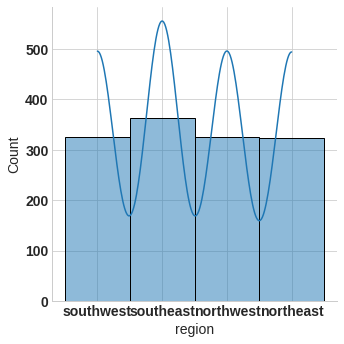

In [560]:

sns.displot(df['region'],kde=True)

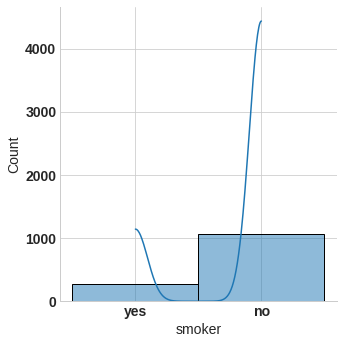

In [561]:
sns.displot(df['smoker'],kde=True)

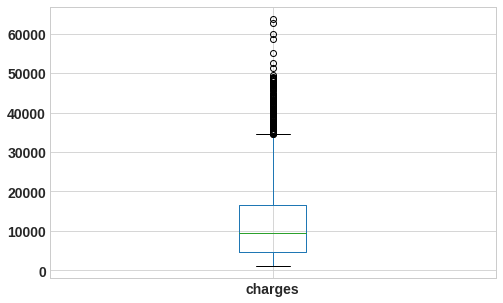

In [562]:
#checking for outliers
df.boxplot(column=['charges'])
plt.show()

In [563]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3-Q1
  upper = Q3 + (1.5*IQR)
  lower = Q1 - (1.5*IQR)
  return upper,lower

In [564]:
up,low = remove_outlier(df['charges'])
df['charges'] = np.where(df['charges']>up,up,df['charges'])
df['charges'] = np.where(df['charges']<low,low,df['charges'])

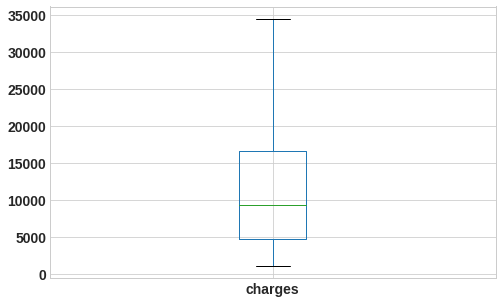

In [565]:
#after removing outliers
df.boxplot(column=['charges'])
plt.show()

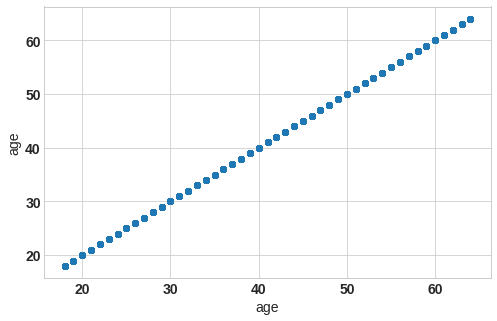

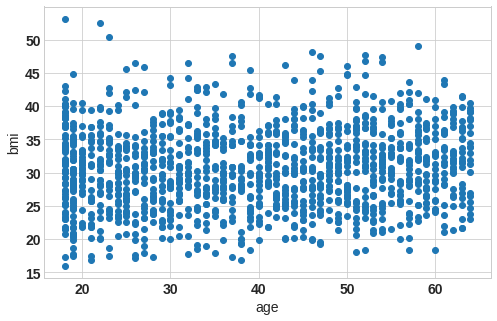

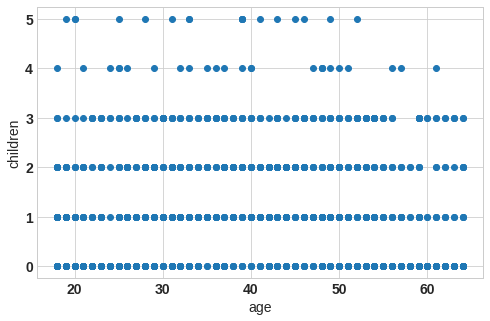

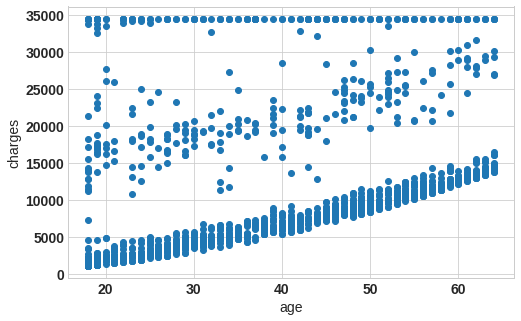

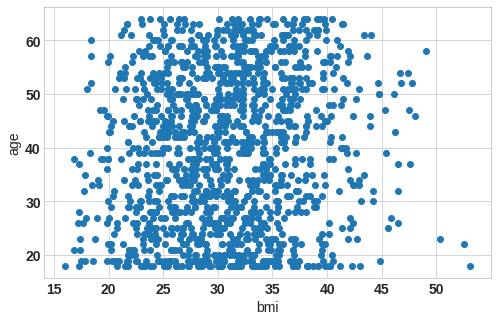

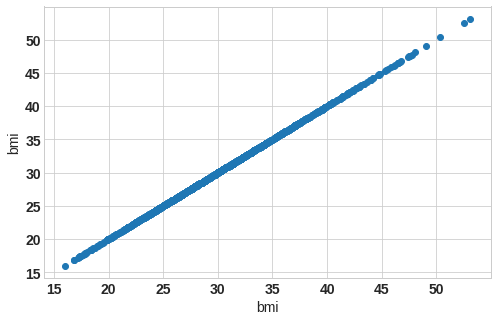

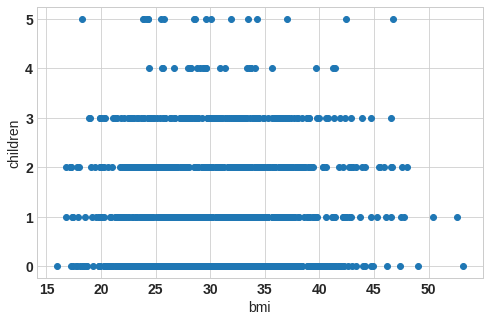

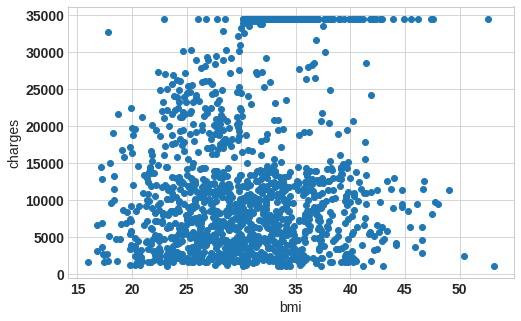

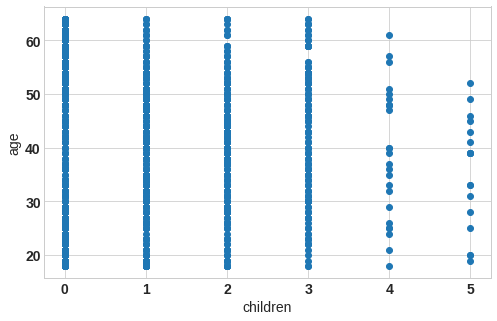

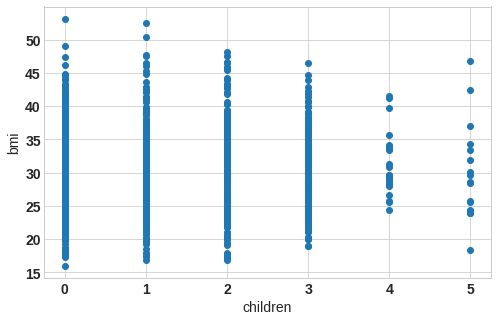

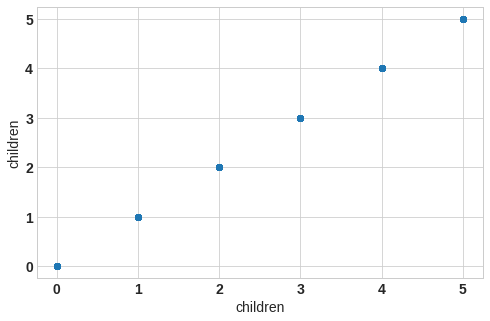

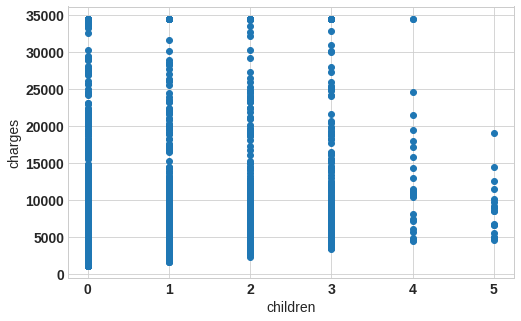

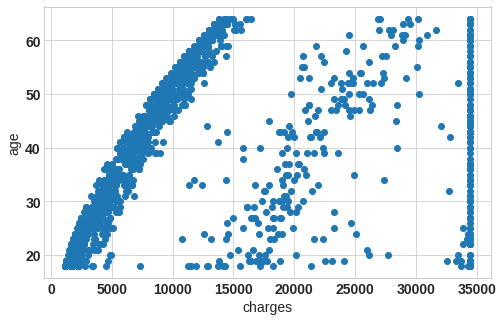

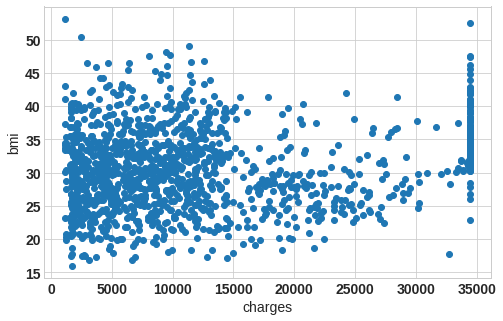

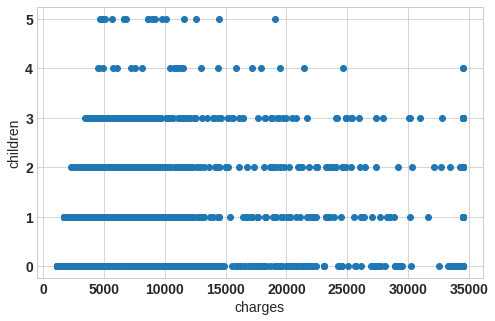

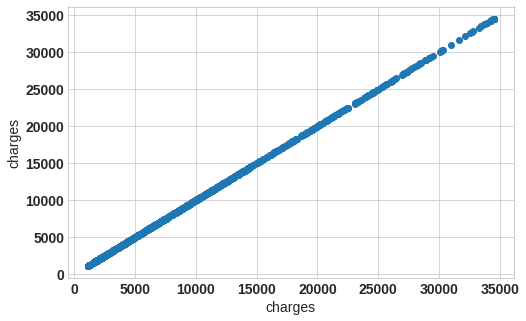

In [566]:
from importlib import reload
reload(plt)
col = ["age",'bmi','children','charges']
col1 = ['age','bmi','children','charges']
for i in col:
  m=i
  for j in col1:
    plt.scatter(df[m],df[j])
    plt.xlabel(m)
    plt.ylabel(j)
    plt.show()

In [567]:
# correlation plot
corr_p = df.corr(method ='pearson')
corr_p

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.313394
bmi,0.109272,1.000000,0.012759,0.160175
children,0.042469,0.012759,1.000000,0.073074
charges,0.313394,0.160175,0.073074,1.000000


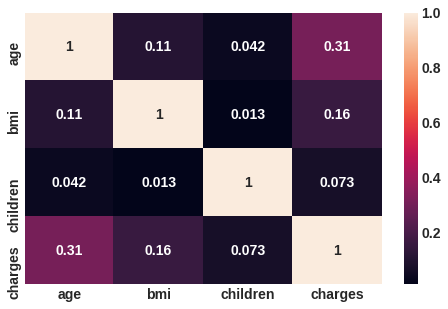

In [568]:
#visulisation plot of correlation matrix
sns.heatmap(corr_p, annot=True)
plt.show()

In [569]:
corr_k=df.corr(method='kendall')
corr_k

,age,bmi,children,charges
age,1.000000,0.073273,0.043253,0.472025
bmi,0.073273,1.000000,0.011562,0.080352
children,0.043253,0.011562,1.000000,0.102750
charges,0.472025,0.080352,0.102750,1.000000


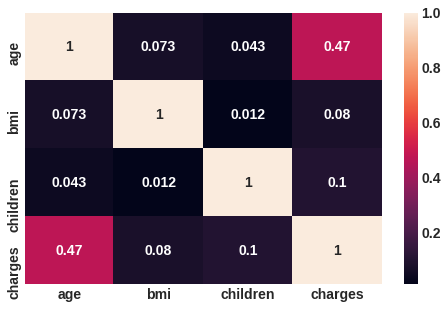

In [570]:
sns.heatmap(corr_k, annot=True)
plt.show()

<Figure size 1080x360 with 0 Axes>

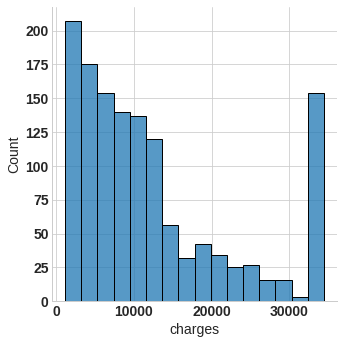

In [571]:
#Plot the distribution of the dependent variable
#histogram plot
f= plt.figure(figsize=(15,5))
# ax=f.add_subplot(121)

# ax.set_title('Distribution of insurance charges')
sns.displot(df['charges'])

# ax=f.add_subplot(122)
# ax.set_title('Distribution of insurance charges in $log$ sacle')

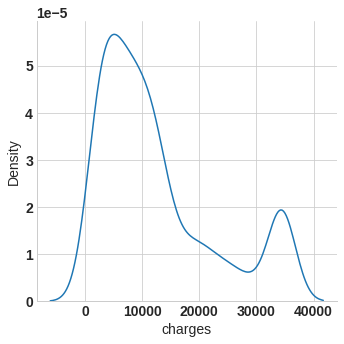

In [572]:
#a curve
# Plot a kernel density estimate and rug plot
sns.displot(data=df['charges'],kind='kde')


In [573]:
print("Skewness: %f" % df['charges'].skew()) #higly postively skewed

Skewness: 1.083730


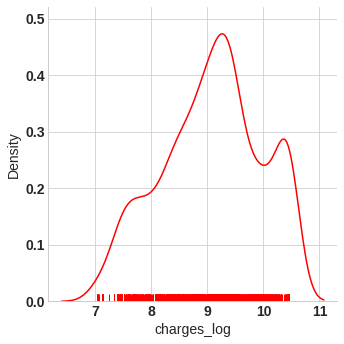

In [574]:
#as it was not a accurate normal curve so transform it using log
df['charges_log'] = df['charges'].apply(np.log)
sns.displot(df['charges_log'], rug=True, kind='kde',color="r")

In [575]:
print("Skewness: %f" % df['charges_log'].skew())

Skewness: -0.223692


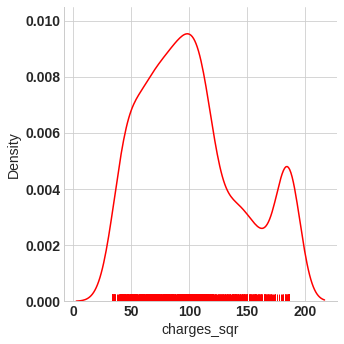

In [576]:
df['charges_sqr']  =df['charges'].apply(np.sqrt)
sns.displot(df['charges_sqr'], rug=True, kind='kde',color="r")

In [577]:
print("Skewness: %f" % df['charges_sqr'].skew())

Skewness: 0.525846


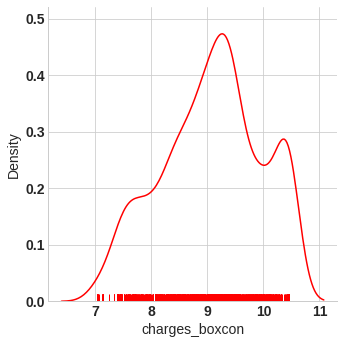

In [578]:
from scipy import stats
df['charges_boxcon']  =stats.boxcox(df['charges'],0)
sns.displot(df['charges_boxcon'], rug=True, kind='kde',color="r")

In [579]:
print("Skewness: %f" % df['charges_boxcon'].skew())

Skewness: -0.223692


#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

In [580]:
#label encoding/one hot encoding
oe = OrdinalEncoder()
df["sex"] = oe.fit_transform(df[["sex"]])
df["smoker"] = oe.fit_transform(df[["smoker"]])
df["region"] = oe.fit_transform(df[["region"]])
df

,age,sex,bmi,children,smoker,region,charges,charges_log,charges_sqr,charges_boxcon
0,19,0.0,27.900,0,1.0,3.0,16884.92400,9.734176,129.942002,9.734176
1,18,1.0,33.770,1,0.0,2.0,1725.55230,7.453302,41.539768,7.453302
2,28,1.0,33.000,3,0.0,2.0,4449.46200,8.400538,66.704288,8.400538
3,33,1.0,22.705,0,0.0,1.0,21984.47061,9.998092,148.271611,9.998092
4,32,1.0,28.880,0,0.0,1.0,3866.85520,8.260197,62.184043,8.260197
...,...,...,...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830,9.268661,102.958964,9.268661
1334,18,0.0,31.920,0,0.0,0.0,2205.98080,7.698927,46.967870,7.698927
1335,18,0.0,36.850,0,0.0,2.0,1629.83350,7.396233,40.371196,7.396233
1336,21,0.0,25.800,0,0.0,3.0,2007.94500,7.604867,44.810099,7.604867


In [581]:
#Train Test split
from sklearn.model_selection import train_test_split
X = df.iloc[:,:6]
y= df.iloc[:,7:8]
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 31)
y_test

#EXTRA ANALYSIS
y_wt_trf = df.iloc[:,5:6]
X_train_trf,  X_test_trf, y_train_trf, y_test = train_test_split(X, y, test_size = 0.30, random_state = 31)

#Model building

In [582]:
# Step 1: add x0 =1 to dataset
X_arr = np.array(X_train)
X_arr_train = np.c_[np.ones(X_arr.shape[0]), X_arr] # to add vector of 1's
y_arr = np.array(y_train)

X_arr_test = np.array(X_test)
X_arr_test_1 = np.c_[np.ones(X_arr_test.shape[0]), X_arr_test] #  to add vector of 1's
y_arr_test = np.array(y_test)

# Step2: build model
def build_model(X, y):
    XTX = np.dot(X.T, X) ## x-transpose times x
    inverse_XTX = np.linalg.inv(XTX) ## inverse of x-transpose times x
    XTY = np.dot(X.T, y) ## x-transpose times y
    return np.dot(inverse_XTX, XTY)


# The parameters for linear regression model
#print("FROM SCRATCH MODEL:")
theta = build_model(X_arr_train,y_arr)
#print('intercept: {} | slope1(age) :{} | slope2(sex) :{} |slope3(bmi) :{} | slope4(children) :{} | slope5(smoker):{} | slope6(region): {}'.format(theta[0], theta[1],theta[2], theta[3],theta[4], theta[5],theta[6]))

In [583]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_arr, y_arr)


#Parameter
theta_sklearn = reg.coef_
# print("FROM SKLEARN MODEL")
# print('intercept: {} | slope1(age) :{} | slope2(sex) :{} |slope3(bmi) :{} | slope4(children) :{} | slope5(smoker):{} | slope6(region): {}'.format(theta_sklearn[0][0], theta_sklearn[0][1],theta_sklearn[0][2], theta_sklearn[0][3],theta_sklearn[0][4], theta_sklearn[0][5],theta_sklearn[0][6]))

In [584]:
temp1 = pd.DataFrame(theta.T,columns=['intercept','age','sex','bmi','children','smoker','region'])
temp2= pd.DataFrame(theta_sklearn,columns=['age','sex','bmi','children','smoker','region'])
comp_coeff = pd.concat([temp1,temp2])
comp_coeff.index = ['SCRATCH MODEL_LOG', 'SKLEARN MODEL_LOG']
comp_coeff

,intercept,age,sex,bmi,children,smoker,region
SCRATCH MODEL_LOG,7.145141,0.034051,-0.083484,0.009551,0.100233,1.42501,-0.040327
SKLEARN MODEL_LOG,NaN,0.034051,-0.083484,0.009551,0.100233,1.42501,-0.040327


In [585]:
X_scratch_test = pd.DataFrame(X_arr_test_1,columns=['intercept','age','sex','bmi','children','smoker','region'])
X_scratch_test

,intercept,age,sex,bmi,children,smoker,region
0,1.0,50.0,0.0,28.12,3.0,0.0,1.0
1,1.0,23.0,0.0,28.00,0.0,0.0,3.0
2,1.0,33.0,1.0,30.25,0.0,0.0,2.0
3,1.0,58.0,1.0,23.30,0.0,0.0,3.0
4,1.0,30.0,1.0,24.40,3.0,1.0,3.0
...,...,...,...,...,...,...,...
397,1.0,18.0,1.0,22.99,0.0,0.0,0.0
398,1.0,63.0,1.0,33.66,3.0,0.0,2.0
399,1.0,28.0,1.0,37.10,1.0,0.0,3.0
400,1.0,51.0,0.0,37.73,1.0,0.0,2.0


#Model evaluation

In [586]:
# # prediction
def predict_model(x_test,theta_temp):
  l=[]
  y_predict=[]
  m = theta_temp[0] + theta_temp[1]*x_test['age'] + theta_temp[2]*x_test['sex'] + theta_temp[3]*x_test['bmi'] + theta_temp[4]*x_test['children'] + theta_temp[5]*x_test['smoker']+ theta_temp[6]*x_test['region']
  y_predict.append(m)
  return y_predict
y_pred= []
y_pred =  predict_model(X_scratch_test,theta)
#np.array(y_pred)
value = pd.DataFrame(y_pred).transpose()
value.columns=['PREDICTED']
value

,PREDICTED
0,9.376621
1,8.074756
2,8.393595
3,9.138156
4,9.920950
...,...
397,7.894148
398,9.748382
399,8.348673
400,9.261666


In [587]:
value['ACTUAL'] = y_arr_test
value

,PREDICTED,ACTUAL
0,9.376621,9.313401
1,8.074756,9.482402
2,8.393595,8.217264
3,9.138156,9.336578
4,9.920950,9.812425
...,...,...
397,7.894148,7.441067
398,9.748382,9.626517
399,8.348673,8.094733
400,9.261666,9.198026


In [588]:
#Evaluvation: MSE (Write your MSE equation from scratch)
def mse_metric(d):
  sum_error = 0.0
  prediction_error = []
  pred_sqr=[]
  prediction_error = d['PREDICTED'] - d['ACTUAL']
  pred_sqr = prediction_error**2
  sum_error = sum(pred_sqr)
  mean_error = sum_error / float(len(d['ACTUAL']))
  #print(prediction_error)
  return (mean_error)
J_mse = mse_metric(value)

In [589]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.23296304772902124


In [590]:
# sklearn regression module
y_pred_sk = reg.predict(X_arr_test)
value['SKLEARN_PREDICTED'] = y_pred_sk
value

,PREDICTED,ACTUAL,SKLEARN_PREDICTED
0,9.376621,9.313401,9.376621
1,8.074756,9.482402,8.074756
2,8.393595,8.217264,8.393595
3,9.138156,9.336578,9.138156
4,9.920950,9.812425,9.920950
...,...,...,...
397,7.894148,7.441067,7.894148
398,9.748382,9.626517,9.748382
399,8.348673,8.094733,8.348673
400,9.261666,9.198026,9.261666


In [591]:
#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(value['ACTUAL'],value['SKLEARN_PREDICTED'])

In [592]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.23296304772902124


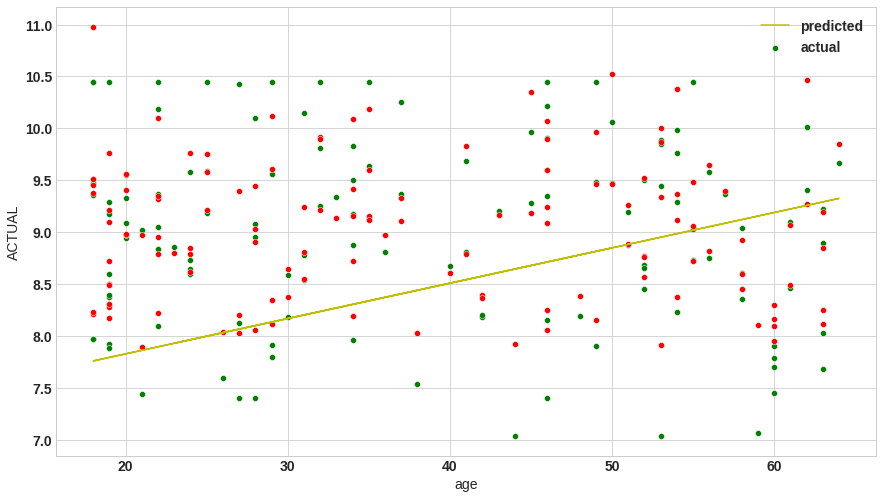

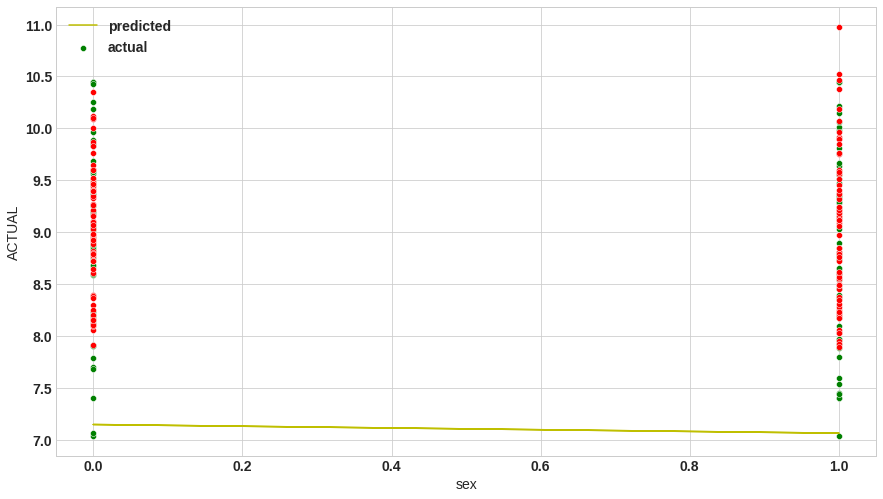

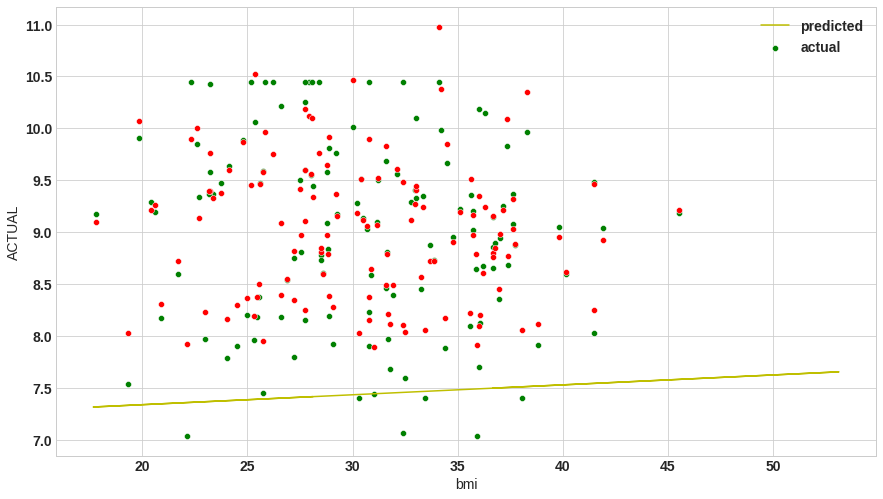

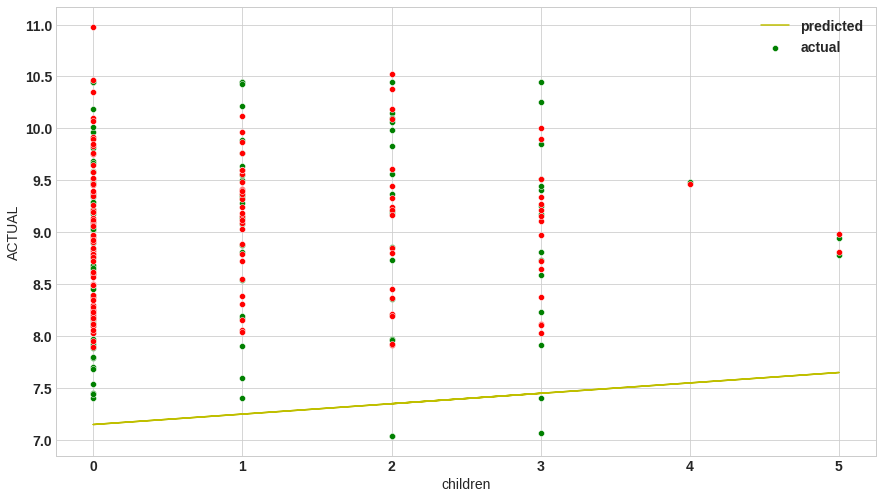

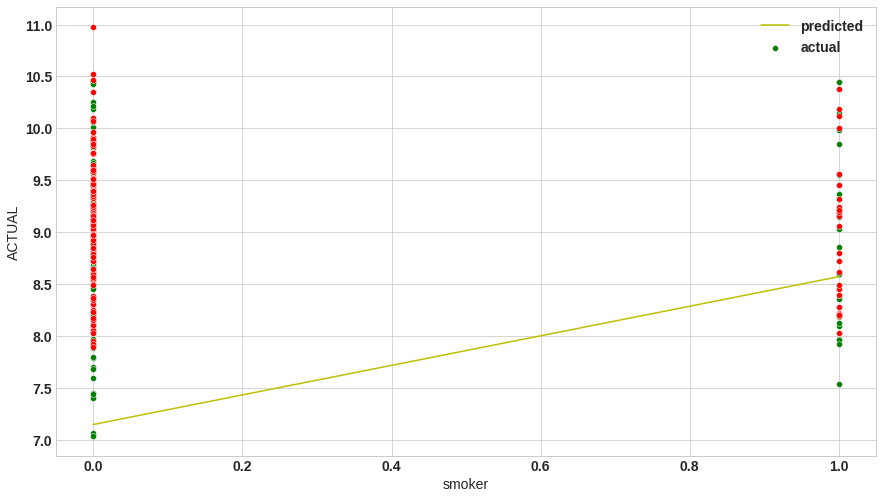

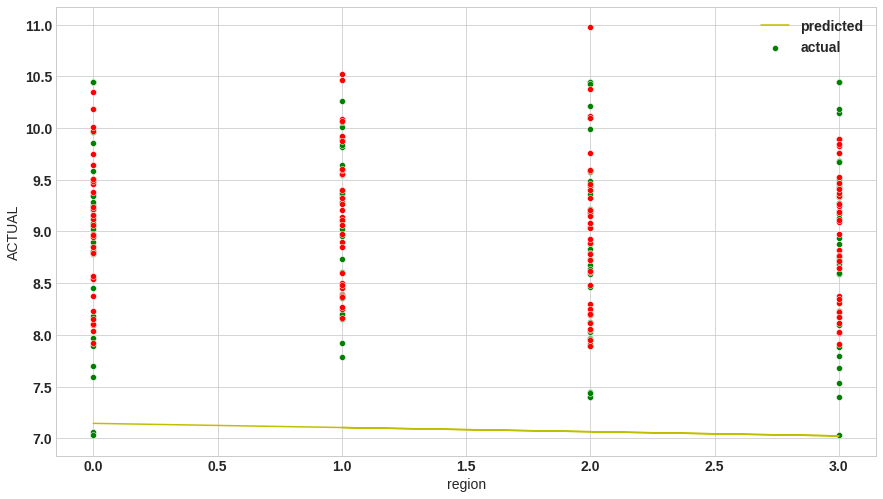

In [593]:
# Check for Linearity
# f = plt.figure(figsize=(15,5))
# ax = f.add_subplot(121)
features=['age','sex','bmi','children','smoker','region']
intercept = theta[0]
i=0
for i in range (0,6):
 fig, ax = plt.subplots(figsize=(14.7, 8.27))
 sns.scatterplot(x= X_test[features[i]], y=value.ACTUAL,color='g')
 sns.scatterplot(x= X_test[features[i]], y=value.PREDICTED, color='r')
 #sns.scatterplot(x= X_test[features[i]], y=value.SKLEARN_PREDICTED, color='b')
 slope, intercept = theta[i+1], intercept
 #slope1= theta_sklearn[0][i]
 plt.plot(X_test[features[i]], slope* X_test[features[i]] + intercept, color='y')
 #plt.plot(X_test[features[i]], slope1* X_test[features[i]] + intercept, color='b')
 plt.xlabel = features[i]
 plt.legend(['predicted','actual'])

EXTRA ANALYSIS

# **WITHOUT ANY TRANSFORMATION**

In [594]:
#SPLITTING
y_wt_trf = df.iloc[:,6:7]
X_train1,  X_test1, y_train1, y_test1 = train_test_split(X, y_wt_trf, test_size = 0.30, random_state = 31)
y_wt_trf

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [595]:
#adding x0=1
X_arr1 = np.array(X_train1)
X_arr_train1 = np.c_[np.ones(X_arr1.shape[0]), X_arr1] # to add vector of 1's
y_arr1 = np.array(y_train1)

X_arr_test1 = np.array(X_test1)
X_arr_test10 = np.c_[np.ones(X_arr_test1.shape[0]), X_arr_test1] #  to add vector of 1's
y_arr_test1 = np.array(y_test1)

In [596]:
#get the parameters from scratch model
theta1 = build_model(X_arr_train1,y_arr1)

#get the parameters from build model
reg1 = LinearRegression().fit(X_arr1, y_arr1)
theta_sklearn1 = reg1.coef_

#combining results of parameters from both models
temp11 = pd.DataFrame(theta1.T,columns=['intercept','age','sex','bmi','children','smoker','region'])
temp21= pd.DataFrame(theta_sklearn1,columns=['age','sex','bmi','children','smoker','region'])
comp_coeff1 = pd.concat([temp11,temp21])
comp_coeff1.index = ['SCRATCH MODEL_NO_TRANSFORM', 'SKLEARN MODEL_NO_TRANSFORM']
comp_coeff1

,intercept,age,sex,bmi,children,smoker,region
SCRATCH MODEL_NO_TRANSFORM,-7109.668755,241.536046,-314.442201,196.225274,412.328639,20009.200872,-209.903317
SKLEARN MODEL_NO_TRANSFORM,NaN,241.536046,-314.442201,196.225274,412.328639,20009.200872,-209.903317


In [597]:
X_scratch_test1 = pd.DataFrame(X_arr_test10,columns=['intercept','age','sex','bmi','children','smoker','region'])
X_scratch_test1

,intercept,age,sex,bmi,children,smoker,region
0,1.0,50.0,0.0,28.12,3.0,0.0,1.0
1,1.0,23.0,0.0,28.00,0.0,0.0,3.0
2,1.0,33.0,1.0,30.25,0.0,0.0,2.0
3,1.0,58.0,1.0,23.30,0.0,0.0,3.0
4,1.0,30.0,1.0,24.40,3.0,1.0,3.0
...,...,...,...,...,...,...,...
397,1.0,18.0,1.0,22.99,0.0,0.0,0.0
398,1.0,63.0,1.0,33.66,3.0,0.0,2.0
399,1.0,28.0,1.0,37.10,1.0,0.0,3.0
400,1.0,51.0,0.0,37.73,1.0,0.0,2.0


In [598]:
#prediction of scratch model
y_pred1= []
y_pred1 =  predict_model(X_scratch_test1,theta1)
#np.array(y_pred)
value1 = pd.DataFrame(y_pred1).transpose()
value1.columns=['PREDICTED']

value1['ACTUAL'] = y_arr_test1

#prediction from build model
y_pred_sk1 = reg1.predict(X_arr_test1)
value1['SKLEARN_PREDICTED'] = y_pred_sk1
value1

,PREDICTED,ACTUAL,SKLEARN_PREDICTED
0,11512.070825,11085.586800,11512.070825
1,3310.258006,13126.677450,3310.258006
2,6062.586445,3704.354500,6062.586445
3,10527.318620,11345.519000,10527.318620
4,25226.343928,18259.216000,25226.343928
...,...,...,...
397,1434.756907,1704.568100,1434.756907
398,15214.781917,15161.534400,15214.781917
399,6401.474661,3277.161000,6401.474661
400,12604.771155,9877.607700,12604.771155


In [599]:
#mse from scratch model
J_mse1 = mse_metric(value1)
print('The Mean Square Error(MSE) or J(theta) without any transformation for scratch model is: ',J_mse1)

#mse from build model
J_mse_sk1 = mean_squared_error(value1['ACTUAL'],value1['SKLEARN_PREDICTED'])
print('The Mean Square Error(MSE) or J(theta) without any transformation for buitin model is: ',J_mse_sk1)

The Mean Square Error(MSE) or J(theta) without any transformation for scratch model is:  28877443.32887806
The Mean Square Error(MSE) or J(theta) without any transformation for buitin model is:  28877443.328878053


age [241.53604577]
sex [-314.44220135]
bmi [196.22527358]
children [412.32863875]
smoker [20009.2008717]
region [-209.90331749]


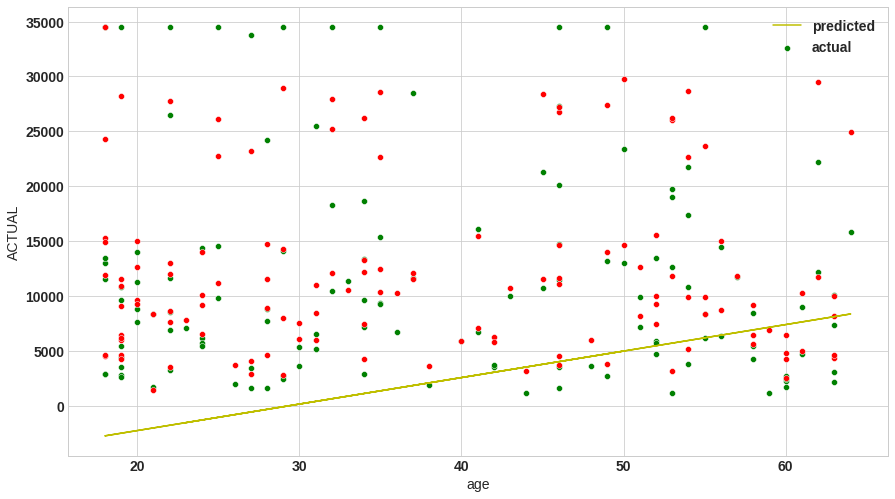

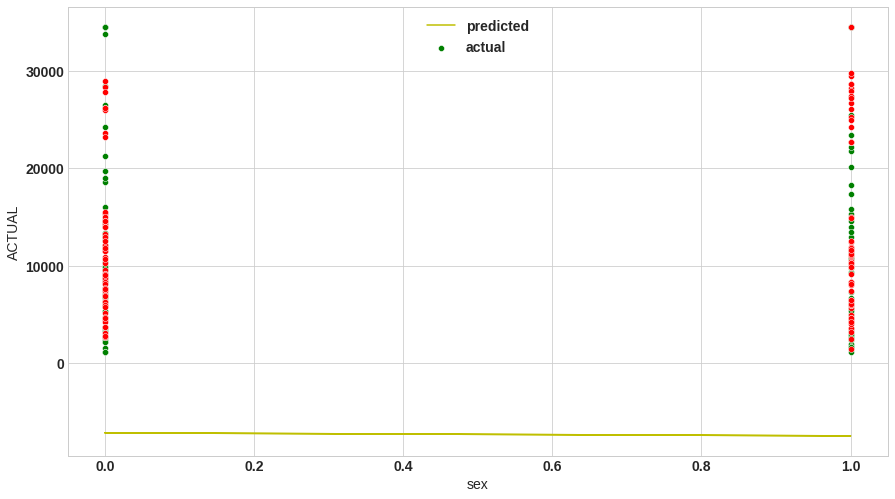

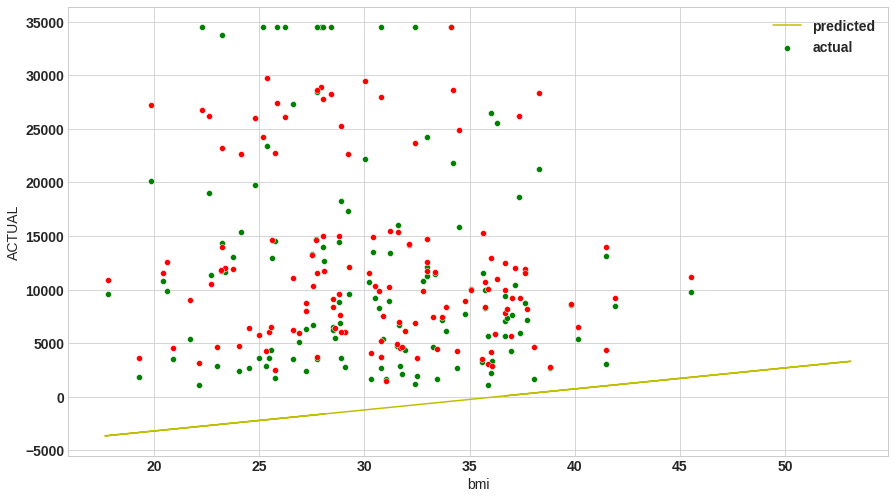

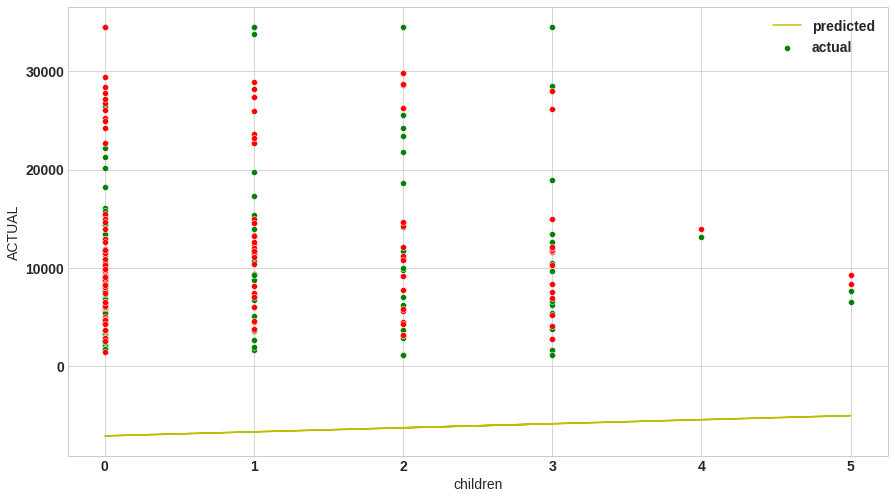

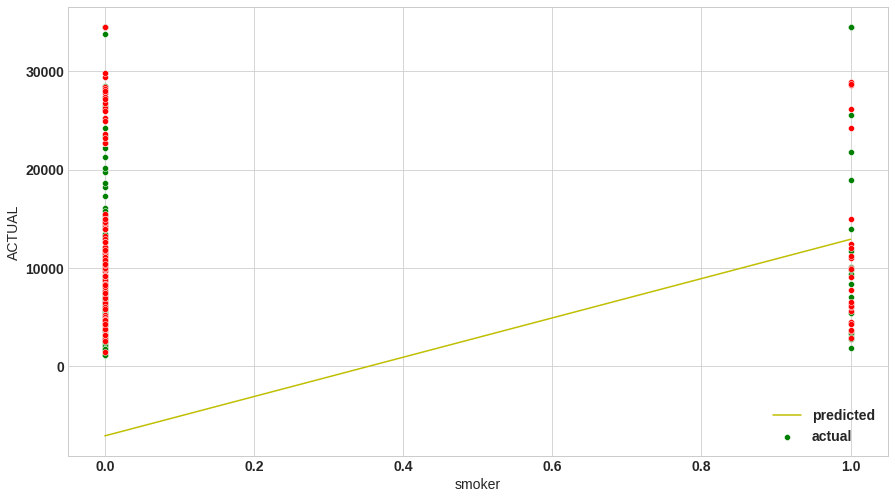

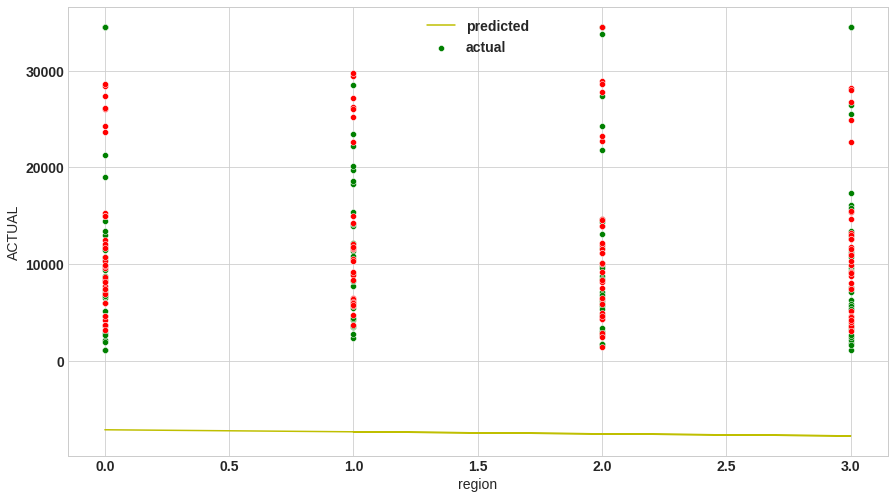

In [600]:
features1=['age','sex','bmi','children','smoker','region']
intercept1 = theta1[0]
i=0
for i in range (0,6):
 fig, ax = plt.subplots(figsize=(14.7, 8.27))
 sns.scatterplot(x= X_test1[features1[i]], y=value1.ACTUAL,color='g')
 sns.scatterplot(x= X_test1[features1[i]], y=value1.SKLEARN_PREDICTED, color='r')
 slope1, intercept1 = theta1[i+1], intercept1
 print(features1[i],slope1)
 plt.plot(X_test1[features1[i]], slope1* X_test1[features1[i]] + intercept1, color='y')
 plt.xlabel = features1[i]
 plt.legend(['predicted','actual'])

# **WITH SQRT TRANFORMATION**

In [601]:
#SPLITTING
y_sqrt = df.iloc[:,8:9]
X_train2,  X_test2, y_train2, y_test2 = train_test_split(X, y_sqrt, test_size = 0.30, random_state = 31)
y_sqrt

,charges_sqr
0,129.942002
1,41.539768
2,66.704288
3,148.271611
4,62.184043
...,...
1333,102.958964
1334,46.967870
1335,40.371196
1336,44.810099


In [602]:
#adding x0=1
X_arr2 = np.array(X_train1)
X_arr_train2 = np.c_[np.ones(X_arr2.shape[0]), X_arr2] # to add vector of 1's
y_arr2 = np.array(y_train2)

X_arr_test2 = np.array(X_test2)
X_arr_test11 = np.c_[np.ones(X_arr_test2.shape[0]), X_arr_test2] #  to add vector of 1's
y_arr_test2 = np.array(y_test2)

In [603]:
#get the parameters from scratch model
theta2 = build_model(X_arr_train2,y_arr2)

#get the parameters from build model
reg2 = LinearRegression().fit(X_arr2, y_arr2)
theta_sklearn2 = reg2.coef_

#combining results of parameters from both models
temp12 = pd.DataFrame(theta2.T,columns=['intercept','age','sex','bmi','children','smoker','region'])
temp22= pd.DataFrame(theta_sklearn2,columns=['age','sex','bmi','children','smoker','region'])
comp_coeff2 = pd.concat([temp12,temp22])
comp_coeff2.index = ['SCRATCH MODEL_SQRT', 'SKLEARN MODEL_SQRT']
comp_coeff2

,intercept,age,sex,bmi,children,smoker,region
SCRATCH MODEL_SQRT,12.471824,1.364763,-2.543172,0.653644,3.12238,80.516726,-1.370618
SKLEARN MODEL_SQRT,NaN,1.364763,-2.543172,0.653644,3.12238,80.516726,-1.370618


In [604]:
X_scratch_test2 = pd.DataFrame(X_arr_test11,columns=['intercept','age','sex','bmi','children','smoker','region'])
X_scratch_test2

,intercept,age,sex,bmi,children,smoker,region
0,1.0,50.0,0.0,28.12,3.0,0.0,1.0
1,1.0,23.0,0.0,28.00,0.0,0.0,3.0
2,1.0,33.0,1.0,30.25,0.0,0.0,2.0
3,1.0,58.0,1.0,23.30,0.0,0.0,3.0
4,1.0,30.0,1.0,24.40,3.0,1.0,3.0
...,...,...,...,...,...,...,...
397,1.0,18.0,1.0,22.99,0.0,0.0,0.0
398,1.0,63.0,1.0,33.66,3.0,0.0,2.0
399,1.0,28.0,1.0,37.10,1.0,0.0,3.0
400,1.0,51.0,0.0,37.73,1.0,0.0,2.0


In [605]:
#prediction of scratch model
y_pred2= []
y_pred2 =  predict_model(X_scratch_test2,theta2)
#np.array(y_pred)
value2 = pd.DataFrame(y_pred2).transpose()
value2.columns=['PREDICTED']

value2['ACTUAL'] = y_arr_test2

#prediction from build model
y_pred_sk2 = reg2.predict(X_arr_test2)
value2['SKLEARN_PREDICTED'] = y_pred_sk2
value2

,PREDICTED,ACTUAL,SKLEARN_PREDICTED
0,107.086942,105.288113,107.086942
1,58.051536,114.571713,58.051536
2,71.997307,60.863409,71.997307
3,100.202933,106.515346,100.202933
4,152.592453,135.126667,152.592453
...,...,...,...
397,49.521649,41.286415,49.521649
398,124.536254,123.132183,124.536254
399,71.402716,57.246493,71.402716
400,107.117842,99.386154,107.117842


In [606]:
#mse from scratch model
J_mse2 = mse_metric(value2)
print('The Mean Square Error(MSE) or J(theta) with sqrt transformation for scratch model is: ',J_mse2)

#mse from build model
J_mse_sk2 = mean_squared_error(value2['ACTUAL'],value2['SKLEARN_PREDICTED'])
print('The Mean Square Error(MSE) or J(theta) with sqrt transformation for buitin model is: ',J_mse_sk2)

The Mean Square Error(MSE) or J(theta) with sqrt transformation for scratch model is:  525.2716891765092
The Mean Square Error(MSE) or J(theta) with sqrt transformation for buitin model is:  525.2716891765104


age [1.36476269]
sex [-2.54317163]
bmi [0.6536437]
children [3.12238048]
smoker [80.51672603]
region [-1.37061769]


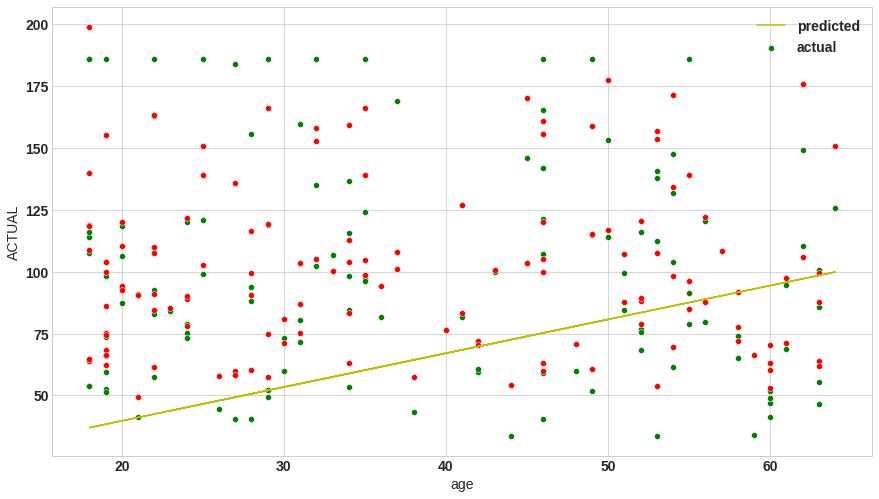

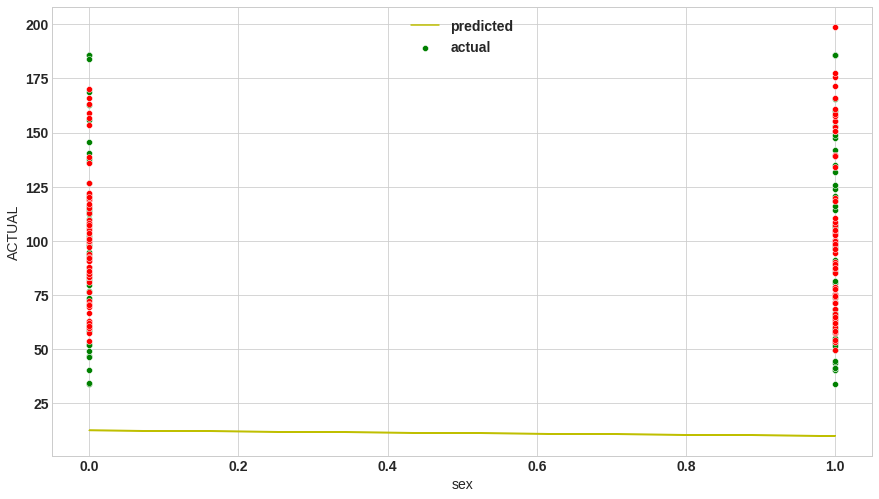

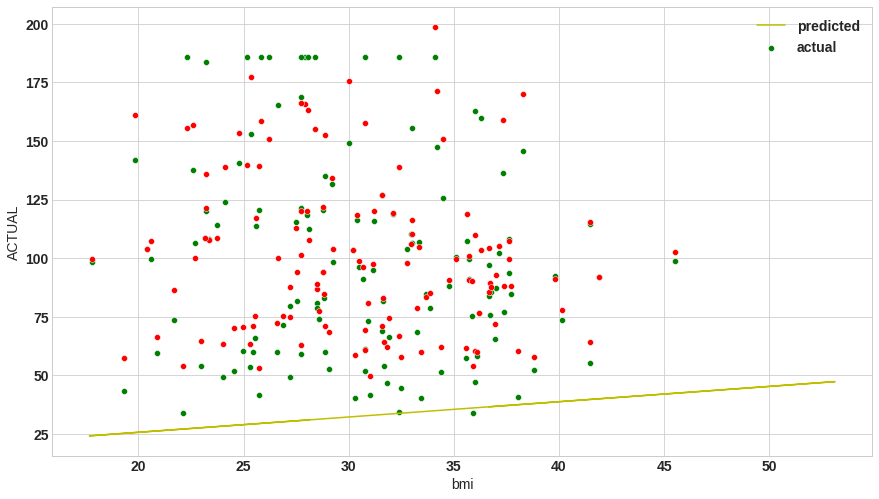

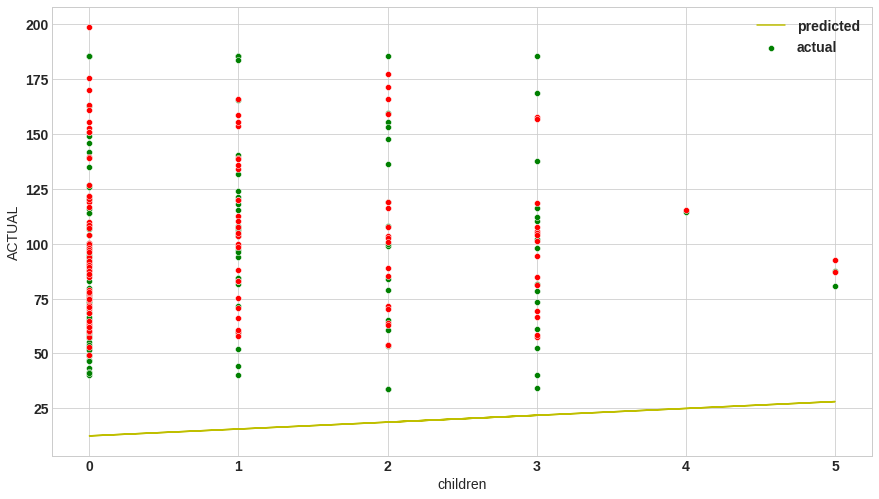

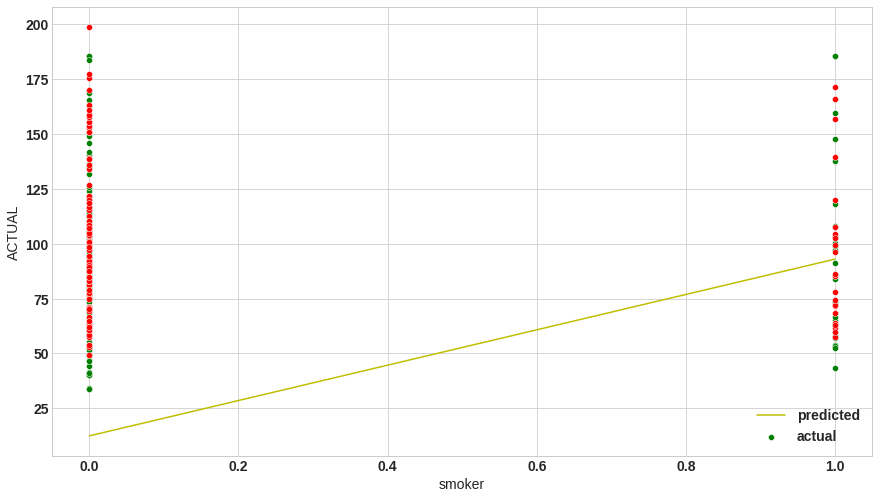

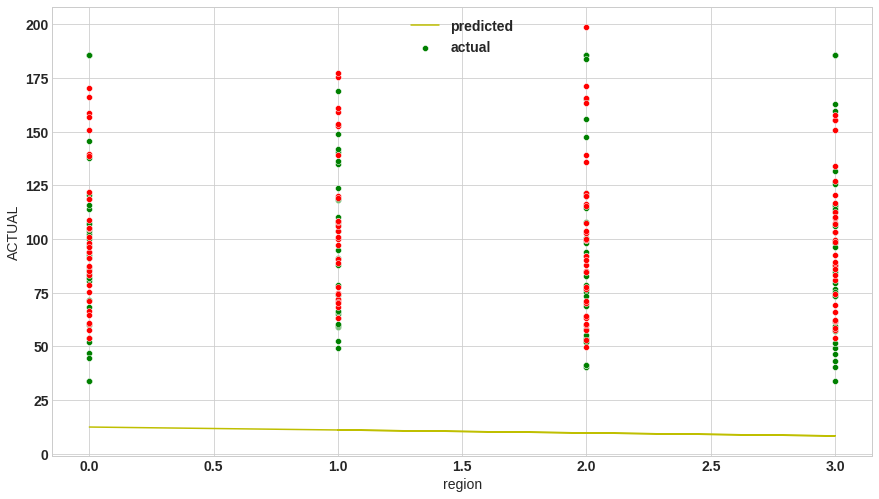

In [607]:
features1=['age','sex','bmi','children','smoker','region']
intercept2 = theta2[0]
i=0
for i in range (0,6):
 fig, ax = plt.subplots(figsize=(14.7, 8.27))
 sns.scatterplot(x= X_test2[features1[i]], y=value2.ACTUAL,color='g')
 sns.scatterplot(x= X_test2[features1[i]], y=value2.PREDICTED, color='r')
 slope2, intercept2 = theta2[i+1], intercept2
 print(features1[i],slope2)
 plt.plot(X_test2[features1[i]], slope2* X_test1[features1[i]] + intercept2, color='y')
 plt.xlabel = features1[i]
 plt.legend(['predicted','actual'])

In [610]:
param_comb = pd.concat([comp_coeff,comp_coeff1,comp_coeff2])
param_comb

,intercept,age,sex,bmi,children,smoker,region
SCRATCH MODEL_LOG,7.145141,0.034051,-0.083484,0.009551,0.100233,1.425010,-0.040327
SKLEARN MODEL_LOG,NaN,0.034051,-0.083484,0.009551,0.100233,1.425010,-0.040327
SCRATCH MODEL_NO_TRANSFORM,-7109.668755,241.536046,-314.442201,196.225274,412.328639,20009.200872,-209.903317
SKLEARN MODEL_NO_TRANSFORM,NaN,241.536046,-314.442201,196.225274,412.328639,20009.200872,-209.903317
SCRATCH MODEL_SQRT,12.471824,1.364763,-2.543172,0.653644,3.122380,80.516726,-1.370618
SKLEARN MODEL_SQRT,NaN,1.364763,-2.543172,0.653644,3.122380,80.516726,-1.370618


In [611]:
temp_list = [[J_mse,J_mse_sk],[J_mse1,J_mse_sk1],[J_mse2,J_mse_sk2]]
mse_comp = pd.DataFrame(temp_list,columns=['MSE FROM SCRATCH','MSE FROM BUILT-IN'])
mse_comp.index=['LOG TRANSFORMATION','WITHOUT TRANFORMATION','SQRT TRANSFORMATION']
mse_comp

,MSE FROM SCRATCH,MSE FROM BUILT-IN
LOG TRANSFORMATION,2.329630e-01,2.329630e-01
WITHOUT TRANFORMATION,2.887744e+07,2.887744e+07
SQRT TRANSFORMATION,5.252717e+02,5.252717e+02
